In [ ]:
import sys
print(sys.executable)


c:\Users\sukha\OneDrive\Desktop\ml-miniproject\venv\Scripts\python.exe


In [ ]:
!pip install imbalanced-learn



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1️⃣ Load dataset
df = pd.read_csv("../data/parkinsons.data")
print("✅ Dataset loaded successfully!\n")

✅ Dataset loaded successfully!



In [ ]:
# 2️⃣ Basic info
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

Dataset shape: (195, 24)

Columns:
 ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

First 5 rows:
              name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465 

In [ ]:
# 3️⃣ Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [ ]:
# 4️⃣ Summary statistics
print("\nStatistical summary:\n", df.describe())


Statistical summary:
        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540 

In [ ]:
# 5️⃣ Class balance
print("\nTarget variable distribution:")
print(df['status'].value_counts())  # 1 = Parkinson’s, 0 = Healthy


Target variable distribution:
status
1    147
0     48
Name: count, dtype: int64


In [ ]:
# 7️⃣ Preprocessing: Feature scaling
# Drop non-numeric / unnecessary columns (e.g., name)
X = df.drop(['name', 'status'], axis=1)
y = df['status']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Features scaled successfully!")
print("Scaled feature shape:", X_scaled.shape)


✅ Features scaled successfully!
Scaled feature shape: (195, 22)


In [ ]:
df.columns


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
!{sys.executable} -m pip install imbalanced-learn


  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


In [ ]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_csv("../data/parkinsons.data")

# Drop the non-numeric column
df = df.drop(columns=["name"])

# Split into features and target
X = df.drop(columns=["status"])
y = df["status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Step 1: Separate features and target
X = df.drop(columns=['status'])
y = df['status']

# Step 2: Check original class distribution
print("Class distribution BEFORE SMOTE:")
print(y.value_counts())
print()

# Step 3: Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("Training set class distribution BEFORE SMOTE:")
print(y_train.value_counts())
print()

# Step 4: Apply SMOTE to oversample minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Step 5: Check new distribution after SMOTE
print("Training set class distribution AFTER SMOTE:")
print(y_train_res.value_counts())


Class distribution BEFORE SMOTE:
status
1    147
0     48
Name: count, dtype: int64

Training set class distribution BEFORE SMOTE:
status
1    118
0     38
Name: count, dtype: int64

Training set class distribution AFTER SMOTE:
status
0    118
1    118
Name: count, dtype: int64


In [ ]:
print(y_train_res.value_counts())


status
0    118
1    118
Name: count, dtype: int64


In [ ]:
# ----------------------------------------------
# ✅ Step 6: Calculate Overall and Healthy Means
# ----------------------------------------------

import pandas as pd

# Combine resampled X and y into one DataFrame
train_resampled = pd.DataFrame(X_train_res, columns=X.columns)
train_resampled["status"] = y_train_res.values

# (A) Overall Mean (after SMOTE)
overall_mean = train_resampled.drop(columns="status").mean()

# (B) Healthy Mean (from original dataset, not SMOTE)
healthy_mean = df[df["status"] == 0].drop(columns=["status"]).mean()

# Display results
print("\n✅ Overall Mean (After SMOTE):")
display(overall_mean)

print("\n💚 Healthy Mean (Before SMOTE):")
display(healthy_mean)

# Optionally save to CSV files for your Streamlit app
overall_mean.to_csv("overall_mean.csv", index=True)
healthy_mean.to_csv("healthy_mean.csv", index=True)

print("\n📂 Mean values saved as 'overall_mean.csv' and 'healthy_mean.csv'")



✅ Overall Mean (After SMOTE):


MDVP:Fo(Hz)         160.309106
MDVP:Fhi(Hz)        193.771348
MDVP:Flo(Hz)        125.509071
MDVP:Jitter(%)        0.005502
MDVP:Jitter(Abs)      0.000038
MDVP:RAP              0.002879
MDVP:PPQ              0.003029
Jitter:DDP            0.008639
MDVP:Shimmer          0.025988
MDVP:Shimmer(dB)      0.245953
Shimmer:APQ3          0.013731
Shimmer:APQ5          0.015575
MDVP:APQ              0.020951
Shimmer:DDA           0.041194
NHR                   0.020701
HNR                  22.994626
RPDE                  0.476858
DFA                   0.715840
spread1              -6.046413
spread2               0.208085
D2                    2.286592
PPE                   0.180881
dtype: float64


💚 Healthy Mean (Before SMOTE):


MDVP:Fo(Hz)         181.937771
MDVP:Fhi(Hz)        223.636750
MDVP:Flo(Hz)        145.207292
MDVP:Jitter(%)        0.003866
MDVP:Jitter(Abs)      0.000023
MDVP:RAP              0.001925
MDVP:PPQ              0.002056
Jitter:DDP            0.005776
MDVP:Shimmer          0.017615
MDVP:Shimmer(dB)      0.162958
Shimmer:APQ3          0.009504
Shimmer:APQ5          0.010509
MDVP:APQ              0.013305
Shimmer:DDA           0.028511
NHR                   0.011483
HNR                  24.678750
RPDE                  0.442552
DFA                   0.695716
spread1              -6.759264
spread2               0.160292
D2                    2.154491
PPE                   0.123017
dtype: float64


📂 Mean values saved as 'overall_mean.csv' and 'healthy_mean.csv'


In [ ]:
# Step 3: Model Training & Evaluation

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score
)

# --- Train Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred_lr = log_reg.predict(X_test)

print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("-" * 50)

# --- Train Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("-" * 50)

# --- Train Support Vector Machine ---
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)
y_pred_svm = svm.predict(X_test)

print("🔹 SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


#---xgboost---

#xgb = XGBClassifier(random_state=42)
#xgb.fit(X_train_res, y_train_res)   # use resampled data like SVM
#y_pred_xgb = xgb.predict(X_test)

#print("🔹 XGBoost Results:")
#print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
#print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))
#print(classification_report(y_test, y_pred_xgb))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



🔹 Logistic Regression Results:
Accuracy: 0.7948717948717948
ROC-AUC: 0.7965517241379312
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.92      0.79      0.85        29

    accuracy                           0.79        39
   macro avg       0.75      0.80      0.76        39
weighted avg       0.83      0.79      0.80        39

Confusion Matrix:
 [[ 8  2]
 [ 6 23]]
--------------------------------------------------
🔹 Random Forest Results:
Accuracy: 0.8974358974358975
ROC-AUC: 0.8982758620689655
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.90      0.93        29

    accuracy                           0.90        39
   macro avg       0.86      0.90      0.87        39
weighted avg       0.91      0.90      0.90        39

Confusion Matrix:
 [[ 9  1]
 [ 3 26]]
-------------------------------------------------

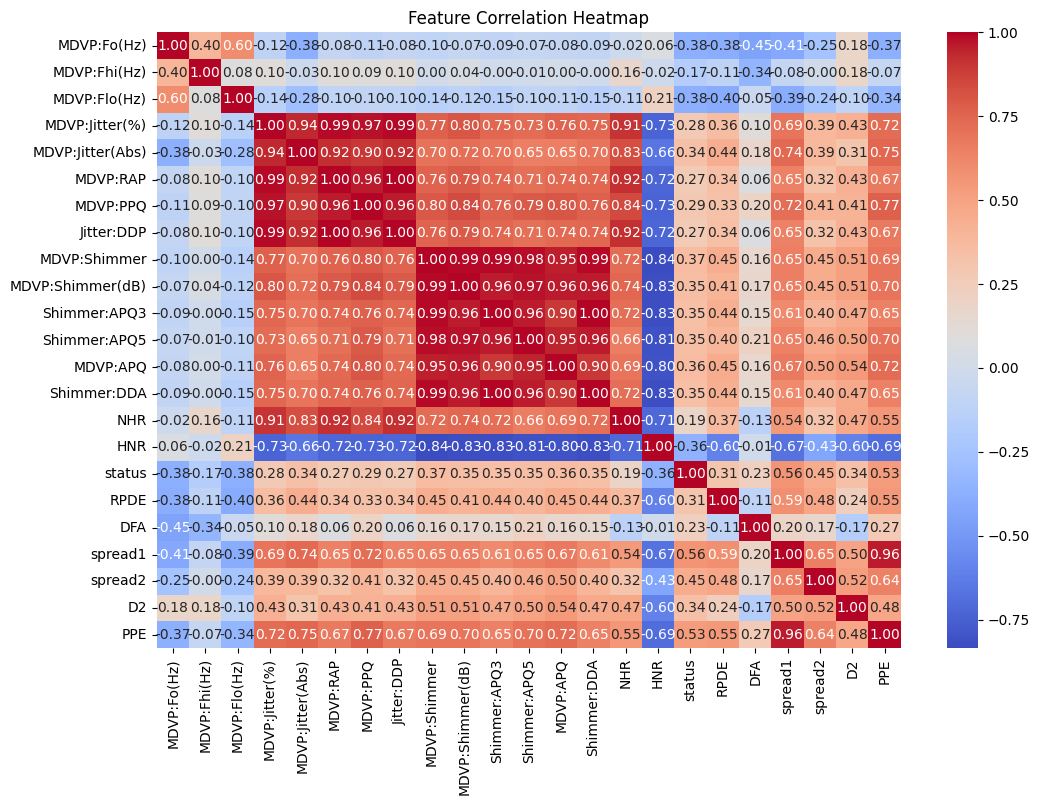

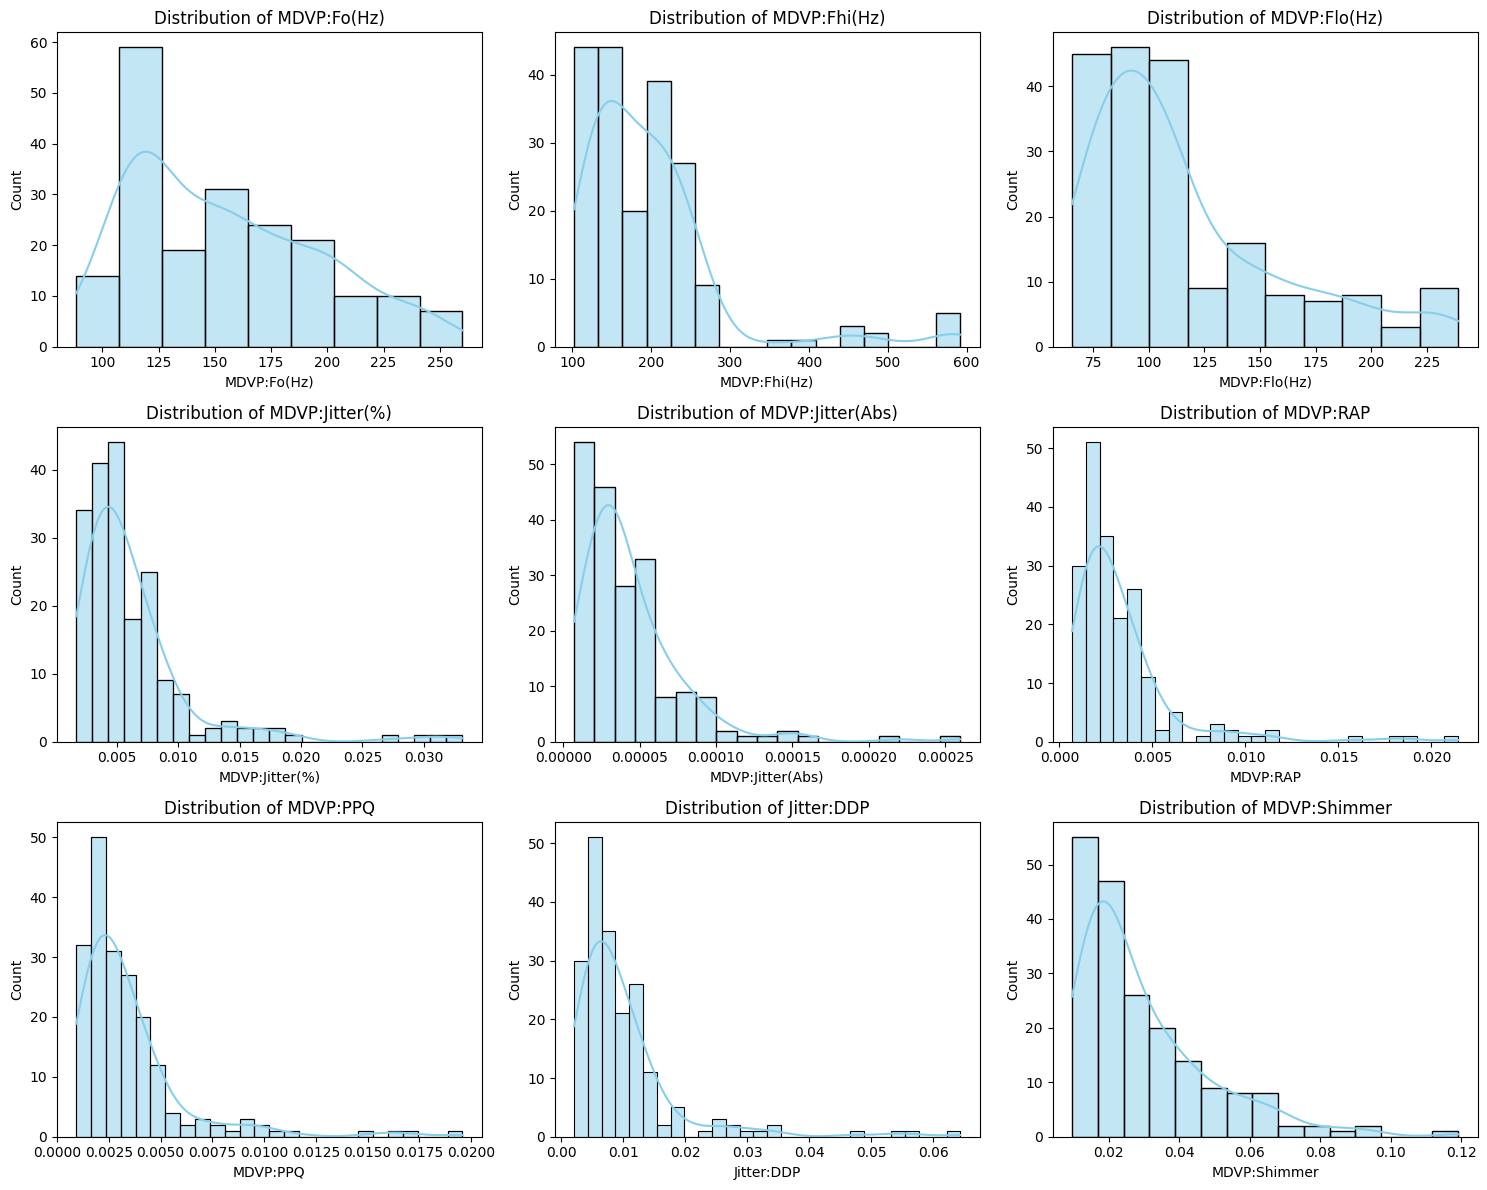

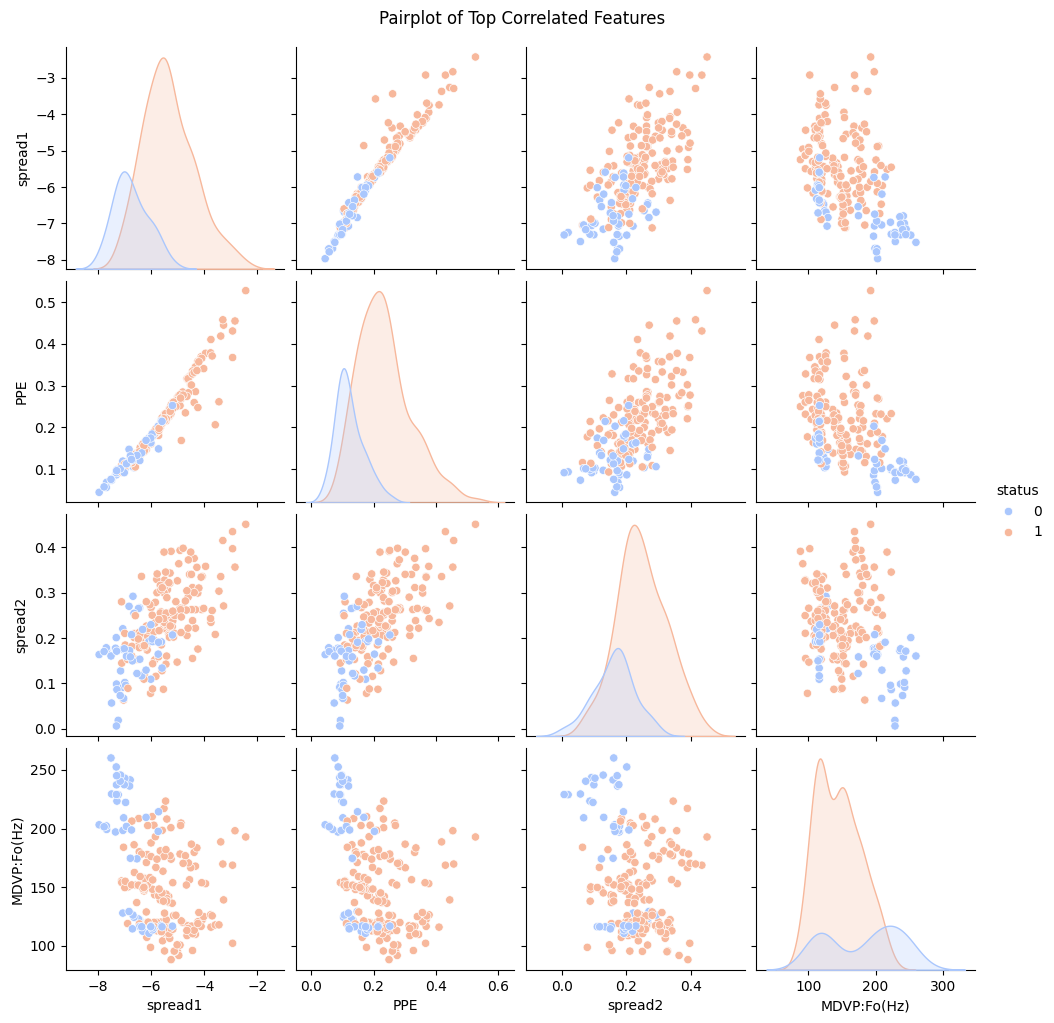


🔹 Evaluating Logistic Regression Model


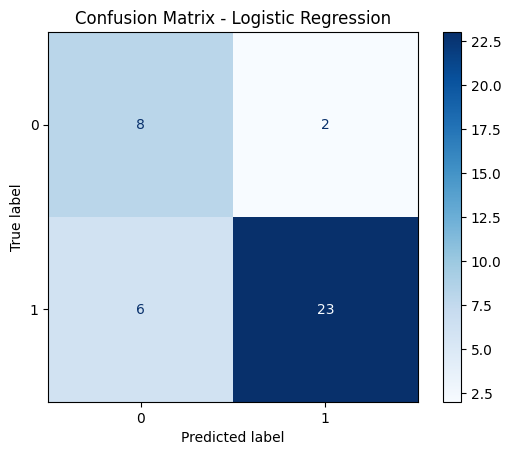

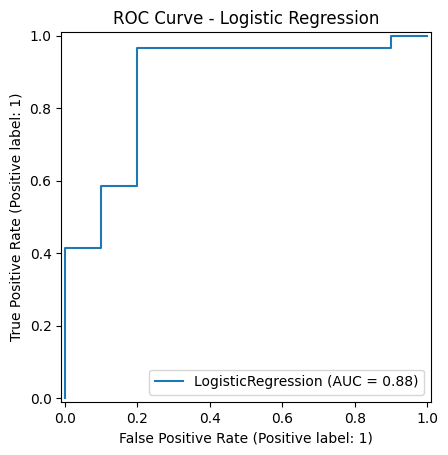


🔹 Evaluating Random Forest Model


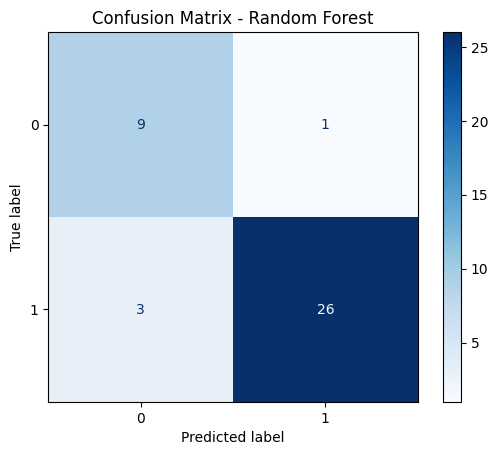

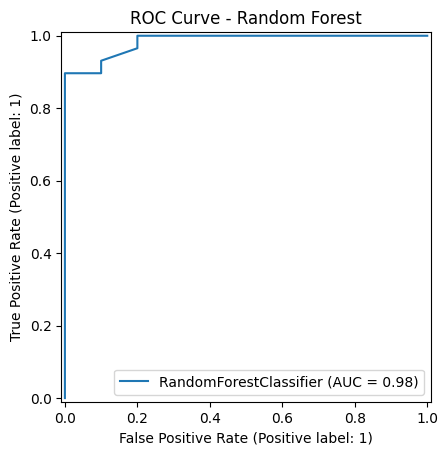


🔹 Evaluating SVM Model


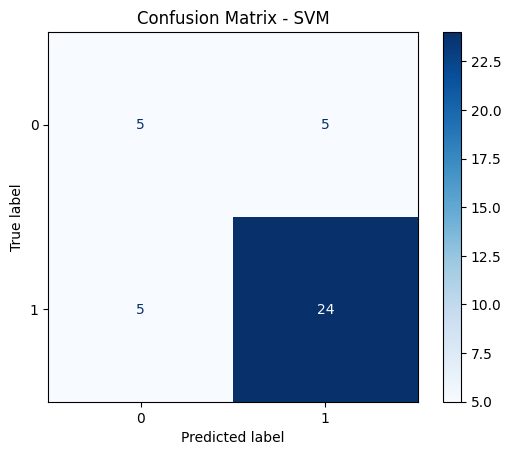

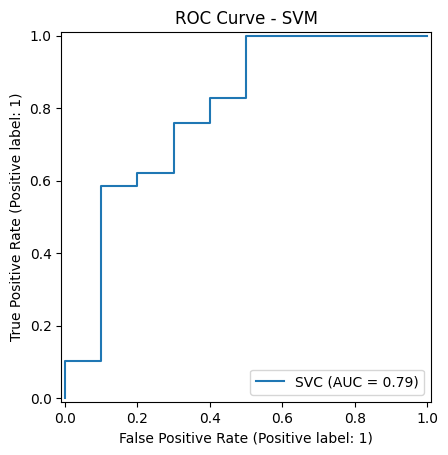

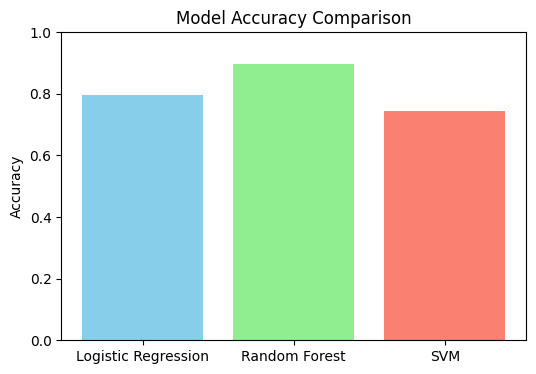

✅ Best model saved successfully as 'parkinsons_best_model.pkl'


In [ ]:
# Step 4: Model Evaluation and Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score
import joblib  # for saving the model

# --- Load the dataset again for visualization (if not already loaded) ---
df = pd.read_csv("../data/parkinsons.data")

# --- Correlation Matrix ---
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Distribution Plots for All Numeric Features ---
num_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_features[:9]):  # show first 9 for readability
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# --- Pairplot for top correlated features ---
top_corr = corr['status'].abs().sort_values(ascending=False).head(5).index
sns.pairplot(df[top_corr], hue='status', palette='coolwarm')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()



# --- Model Evaluation for Logistic Regression, Random Forest, and SVM ---
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'SVM': svm
}

for name, model in models.items():
    print(f"\n🔹 Evaluating {name} Model")

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()



# --- Compare models visually ---
models_list = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure(figsize=(6,4))
plt.bar(models_list, accuracies, color=['skyblue','lightgreen','salmon'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


# --- Save the best model ---
best_model = rf  # you can change this to log_reg or svm based on Step 3 results
joblib.dump(best_model, "../models/parkinsons_best_model.pkl")
print("✅ Best model saved successfully as 'parkinsons_best_model.pkl'")
